## **Capston Project-**

# **Motivation**
The motivation for this analysis arises from my personal interest in the medical field, influenced by my family's background in healthcare.
Also ,in addition to teaching ,I have also job in health care sector. Understanding how diabetes and other medical indicators impact hospital stays can provide valuable insights to improve patient care and hospital efficiency.

# **Data Source**
The dataset used is **"Diabetes 130-US hospitals for years 1999-2008,"** which contains 50 columns including patient demographics, medical conditions, medications, and hospital stay details.

# **Step-1:Loading Dataset**


*   Following code loads the dataset and displays the first few rows and basic information,which in turns help us understand the structure of the data.





In [ ]:
#Importing libraties
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'diabetic_data.csv'
data = pd.read_csv(file_path)

# Display the column names and the first few rows to understand the data
print(data.columns)
data.head()

# Display basic information about the dataset
data.info()


Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 t

# **Step-2: Data Cleaning**


*   I started by handling missing values, converting data types, and removing duplicates to ensure the dataset is ready for analysis



In [ ]:
# Handle missing values
data.replace('?', pd.NA, inplace=True)

# Convert columns to appropriate data types
data['age'] = data['age'].apply(lambda x: x.strip('[]').split('-')[0]).astype(int)
data['time_in_hospital'] = data['time_in_hospital'].astype(int)
data['num_lab_procedures'] = data['num_lab_procedures'].astype(int)
data['num_procedures'] = data['num_procedures'].astype(int)
data['num_medications'] = data['num_medications'].astype(int)
data['number_outpatient'] = data['number_outpatient'].astype(int)
data['number_emergency'] = data['number_emergency'].astype(int)
data['number_inpatient'] = data['number_inpatient'].astype(int)
data['number_diagnoses'] = data['number_diagnoses'].astype(int)

# Remove duplicates
data.drop_duplicates(inplace=True)

# Verify the cleaning steps
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  int64 
 5   weight                    3197 non-null    object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

# **Step-3:Descriptive Statistics**


1.   In this section ,I have calculated descriptive statistics for patients with and without diabetes to understand their hospital stay durations.  

In short ,following  code provides summary statistics for the length of hospital stays for patients with and without diabetes.



In [ ]:
# Descriptive statistics for patients with diabetes
diabetes_data = data[data['diabetesMed'] == 'Yes']
diabetes_stats = diabetes_data['time_in_hospital'].describe()
print("Descriptive Statistics for Patients with Diabetes:")
print(diabetes_stats)

# Descriptive statistics for patients without diabetes
non_diabetes_data = data[data['diabetesMed'] == 'No']
non_diabetes_stats = non_diabetes_data['time_in_hospital'].describe()
print("\nDescriptive Statistics for Patients without Diabetes:")
print(non_diabetes_stats)


Descriptive Statistics for Patients with Diabetes:
count    78363.000000
mean         4.497977
std          3.004532
min          1.000000
25%          2.000000
50%          4.000000
75%          6.000000
max         14.000000
Name: time_in_hospital, dtype: float64

Descriptive Statistics for Patients without Diabetes:
count    23403.000000
mean         4.054480
std          2.893131
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         14.000000
Name: time_in_hospital, dtype: float64


# **Step-4:Statistical Analysis**
*   This statistical test helps determine if the difference in hospital stay lengths between the two groups is significant.

In [ ]:
from scipy import stats

# T-test
t_stat, p_value = stats.ttest_ind(diabetes_data['time_in_hospital'], non_diabetes_data['time_in_hospital'])
print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: 19.98338659388141, P-value: 1.1378412939466574e-88


# **Visualizations**

Following scatter plot shows the relationship between patient age and
length of stay, differentiated by diabetes medication status.

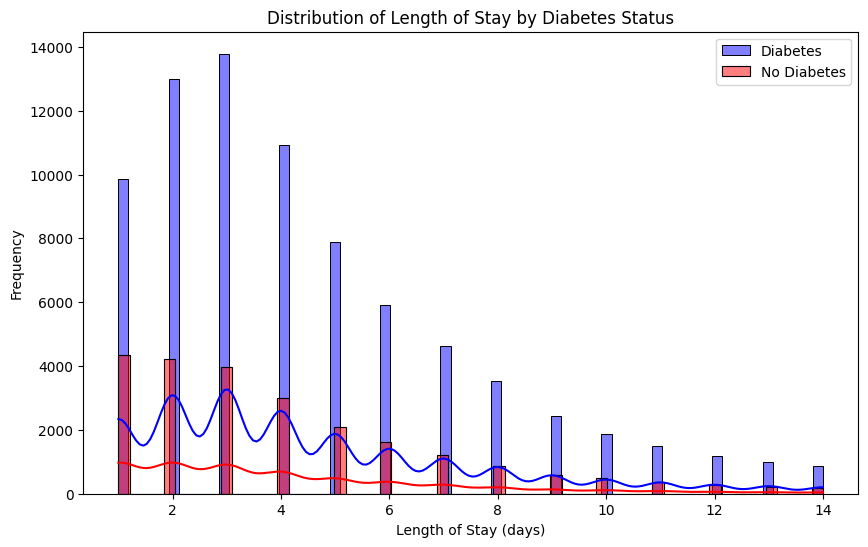

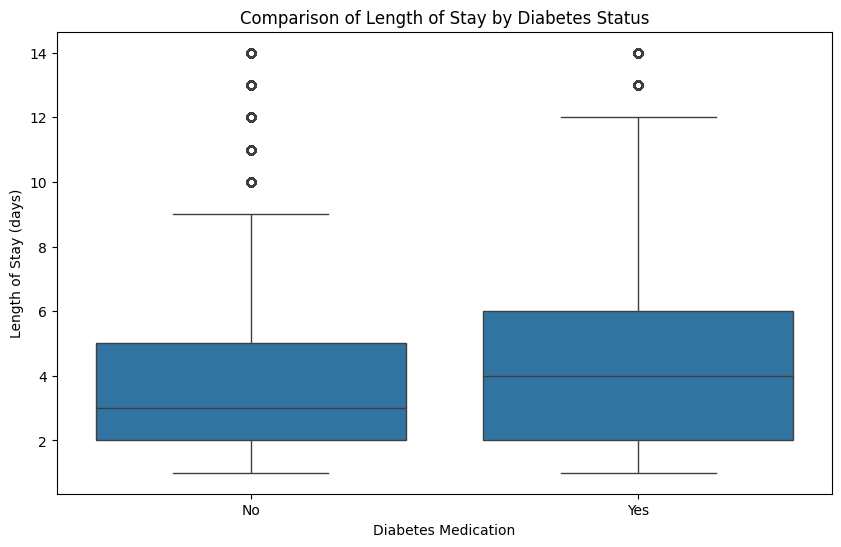

In [ ]:
# Import necessary libraries
import seaborn as sns
from scipy import stats

# Data Visualizations
plt.figure(figsize=(10, 6))
sns.histplot(diabetes_data['time_in_hospital'], kde=True, color='blue', label='Diabetes')
sns.histplot(non_diabetes_data['time_in_hospital'], kde=True, color='red', label='No Diabetes')
plt.title('Distribution of Length of Stay by Diabetes Status')
plt.xlabel('Length of Stay (days)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='diabetesMed', y='time_in_hospital', data=data)
plt.title('Comparison of Length of Stay by Diabetes Status')
plt.xlabel('Diabetes Medication')
plt.ylabel('Length of Stay (days)')
plt.show()


1.   The heatmap visualizes correlations between numerical variables,which helps us to identify relationships between different factors and patient length of stay.
2.   This box plot compares the length of stay between male and female patients, further distinguished by diabetes medication status.
3.   The bar plot shows the average length of stay for different racial groups, split by diabetes medication status.
4.The bar plot shows the average length of stay for different racial groups, split by diabetes medication status.   
.
This line plot illustrates the relationship between the number of procedures a patient undergoes and their length of stay, differentiated by diabetes medication status.
These visualizations provide insights into how age and diabetes medication status impact the length of hospital stays.


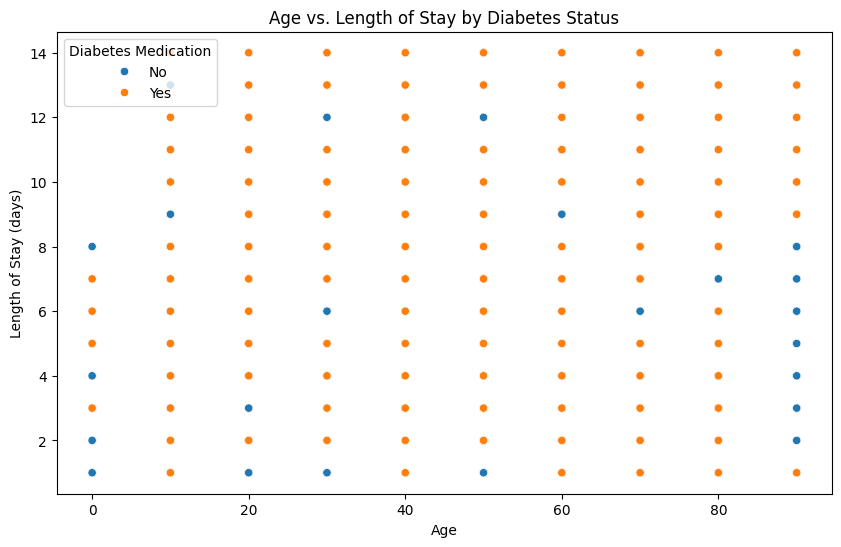

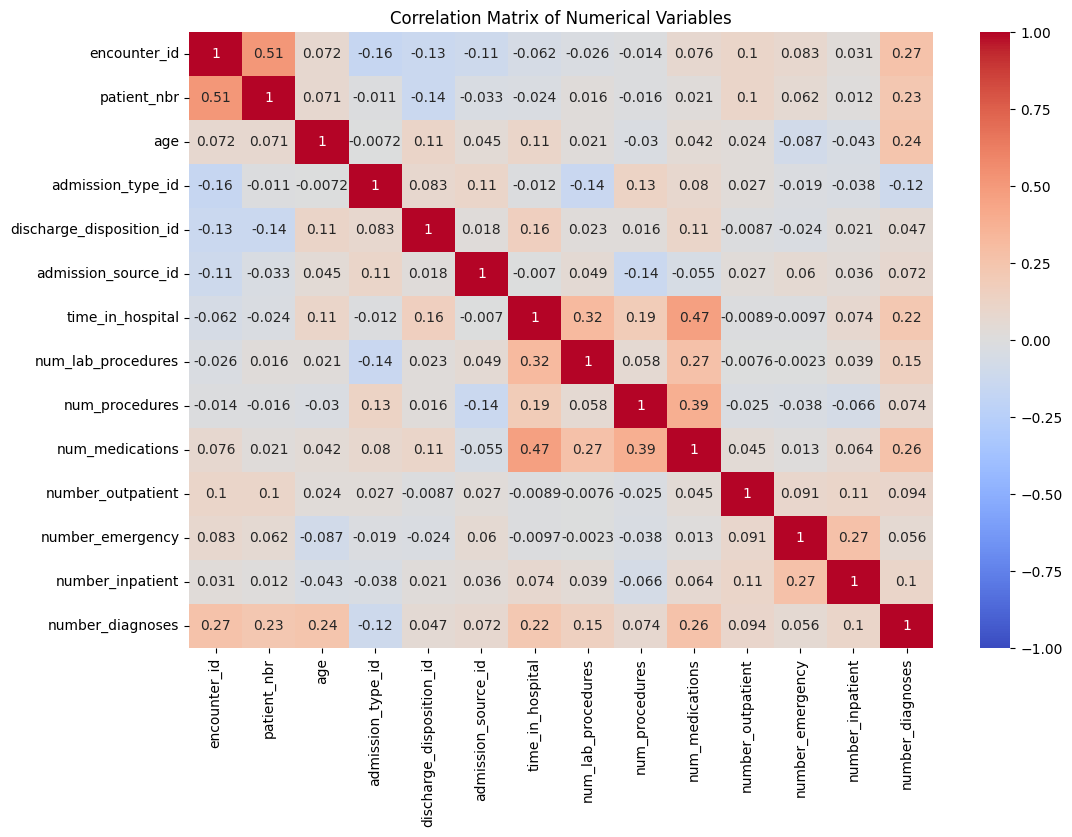

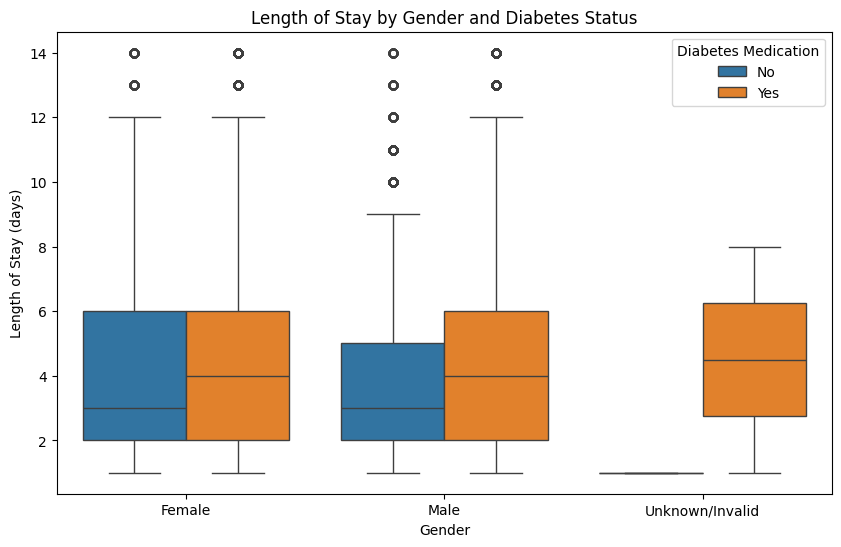

<Figure size 1400x800 with 0 Axes>

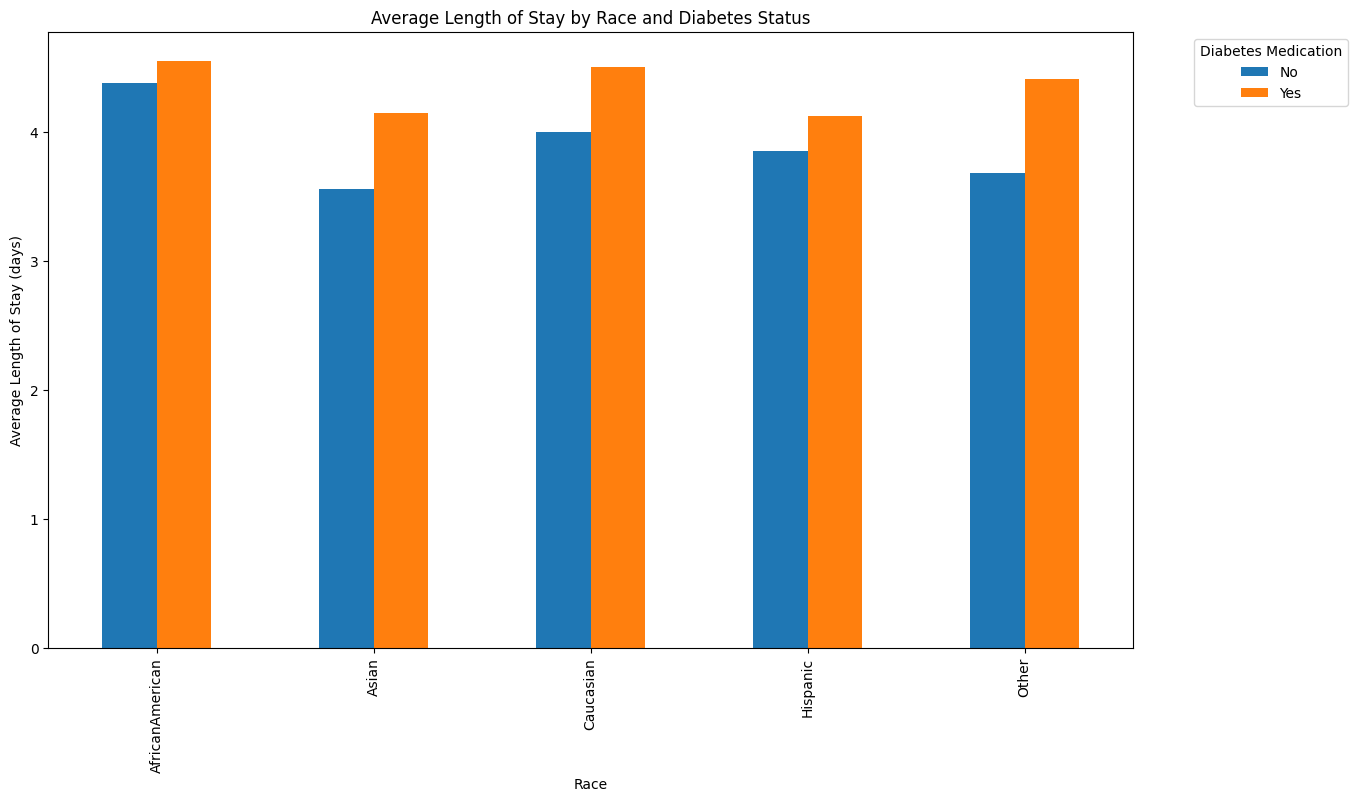

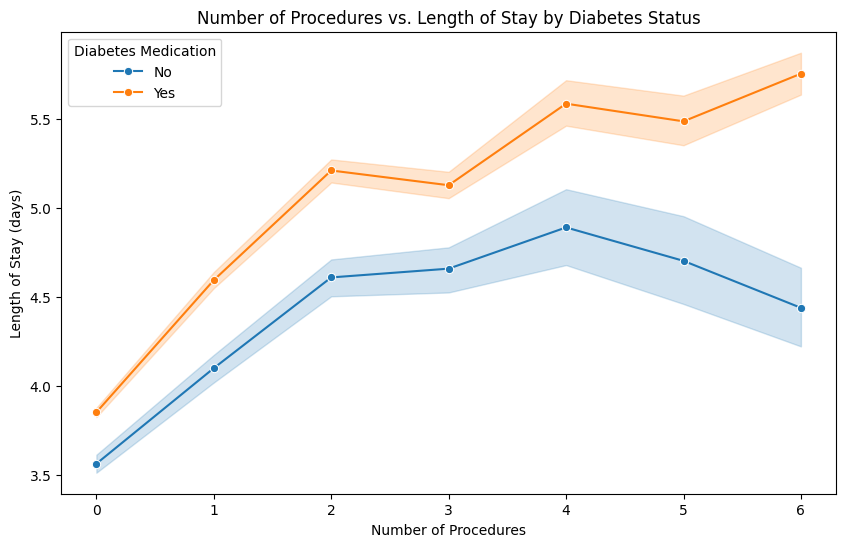

<Figure size 1400x800 with 0 Axes>

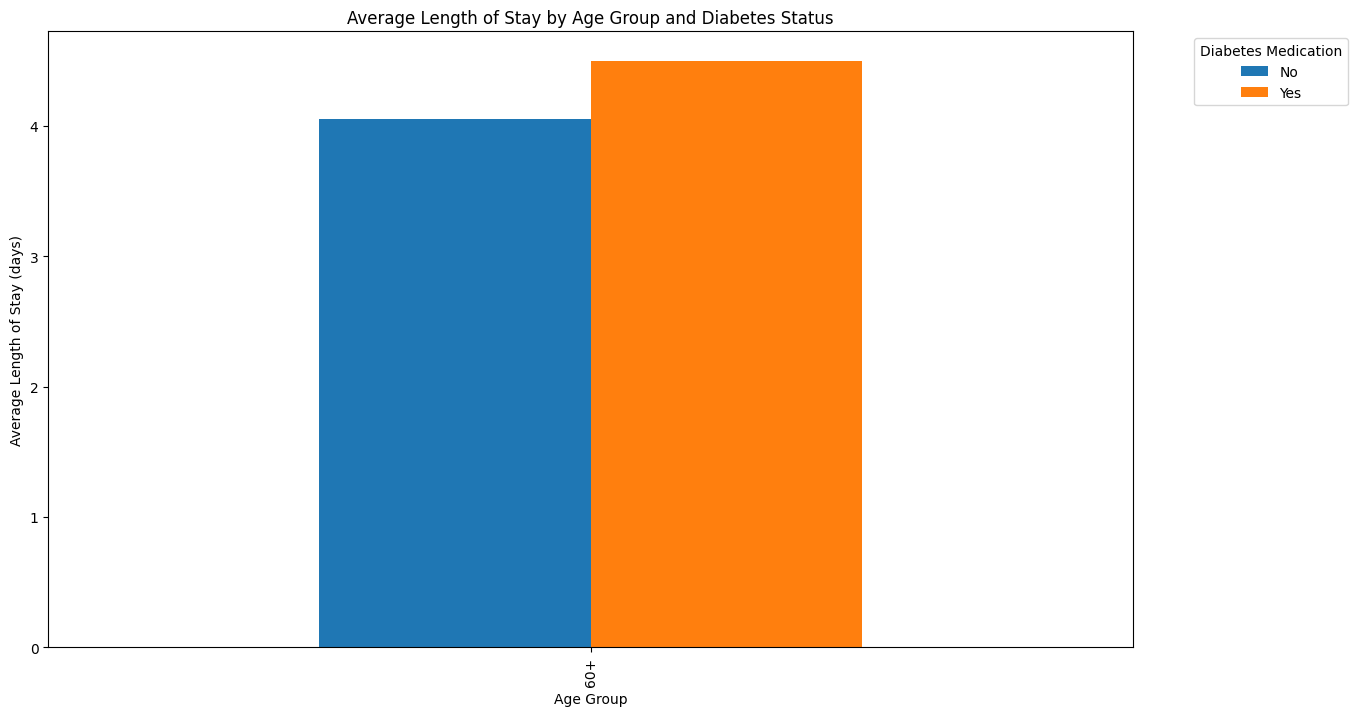

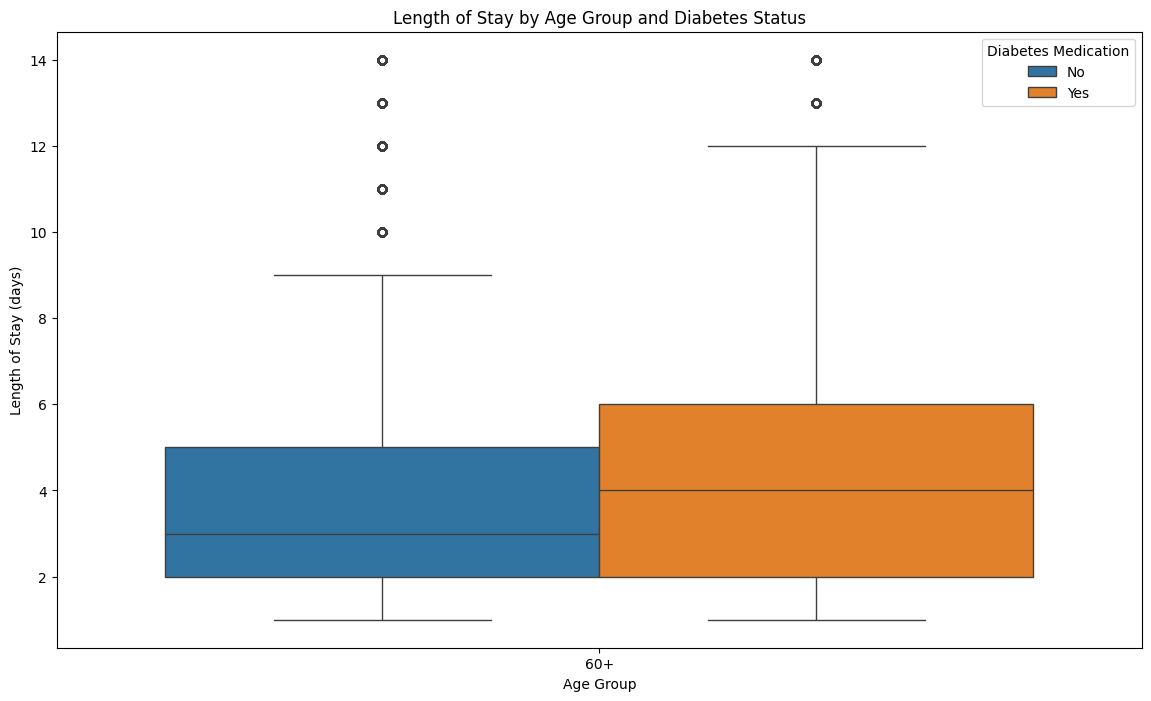

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Additional visualizations for deeper insights

# 1. Scatter plot showing relationship between age and length of stay for patients with and without diabetes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='time_in_hospital', hue='diabetesMed', data=data)
plt.title('Age vs. Length of Stay by Diabetes Status')
plt.xlabel('Age')
plt.ylabel('Length of Stay (days)')
plt.legend(title='Diabetes Medication')
plt.show()
# Drop non-numeric columns for the correlation matrix
numeric_data = data.select_dtypes(include=['number'])

# 2. Heatmap of correlations between numerical variables
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


# 3. Box plot of length of stay by gender and diabetes status
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='time_in_hospital', hue='diabetesMed', data=data)
plt.title('Length of Stay by Gender and Diabetes Status')
plt.xlabel('Gender')
plt.ylabel('Length of Stay (days)')
plt.legend(title='Diabetes Medication')
plt.show()

# 4. Bar plot showing average length of stay by race and diabetes status
plt.figure(figsize=(14, 8))
avg_stay_by_race = data.groupby(['race', 'diabetesMed'])['time_in_hospital'].mean().unstack()
avg_stay_by_race.plot(kind='bar', figsize=(14, 8))
plt.title('Average Length of Stay by Race and Diabetes Status')
plt.xlabel('Race')
plt.ylabel('Average Length of Stay (days)')
plt.legend(title='Diabetes Medication', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 5. Line plot showing trend of number of procedures and length of stay by diabetes status
plt.figure(figsize=(10, 6))
sns.lineplot(x='num_procedures', y='time_in_hospital', hue='diabetesMed', data=data, marker='o')
plt.title('Number of Procedures vs. Length of Stay by Diabetes Status')
plt.xlabel('Number of Procedures')
plt.ylabel('Length of Stay (days)')
plt.legend(title='Diabetes Medication')
plt.show()
# Simplified age group representation
def age_group(age_range):
    if age_range in ['[0-10)', '[10-20)']:
        return '0-19'
    elif age_range in ['[20-30)', '[30-40)']:
        return '20-39'
    elif age_range in ['[40-50)', '[50-60)']:
        return '40-59'
    else:
        return '60+'

data['age_group'] = data['age'].apply(age_group)

# Bar plot showing average length of stay by age group and diabetes status
plt.figure(figsize=(14, 8))
avg_stay_by_age_group = data.groupby(['age_group', 'diabetesMed'])['time_in_hospital'].mean().unstack()
avg_stay_by_age_group.plot(kind='bar', figsize=(14, 8))
plt.title('Average Length of Stay by Age Group and Diabetes Status')
plt.xlabel('Age Group')
plt.ylabel('Average Length of Stay (days)')
plt.legend(title='Diabetes Medication', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Box plot of length of stay by age group and diabetes status
plt.figure(figsize=(14, 8))
sns.boxplot(x='age_group', y='time_in_hospital', hue='diabetesMed', data=data)
plt.title('Length of Stay by Age Group and Diabetes Status')
plt.xlabel('Age Group')
plt.ylabel('Length of Stay (days)')
plt.legend(title='Diabetes Medication')
plt.show()


# **Conclusion**
The analysis reveals that patients with diabetes tend to have longer hospital stays compared to those without diabetes. The statistical analysis confirms this difference is significant, emphasizing the need for targeted interventions to manage diabetes effectively.
Additionally, factors like age, race, and number of procedures also influence the length of stay. Older patients and those undergoing multiple procedures generally have longer hospital stays, highlighting the need for specialized care plans for these groups. Racial disparities in hospital stays suggest that addressing healthcare access and quality can improve outcomes for all patients.
By understanding these factors, healthcare providers can develop targeted strategies to improve patient outcomes and hospital efficiency. These strategies might include enhanced diabetes management programs, age-specific care plans, and efforts to reduce racial disparities in healthcare